# Jane's flower shop_二部探索

Google kickstart 2016（旧 APAC university test 2017）round A の問題[Jane's flower shop](https://codingcompetitions.withgoogle.com/kickstart/round/0000000000201ca2/0000000000201c09)に挑戦する．

この問題は，いろいろ書いてあるが結局は

* 入力: 定数$C_0, C_1, C_2, \dots, C_M$
* 出力: $f(r) = -C_0 \cdot (1 + r)^M + C_1 \cdot (1 + r)^{M - 1} + \dots + C_{M-1} \cdot (1 + r)^1 + C_M \cdot (1 + r)^0 = 0$を満たす$r$，ただし$-1 < r < 1$

である．

$r$が一意に定まるように入力$C_0, C_1, C_2, \dots, C_M$は用意されているようだ．

また，出力は一般に無限小数が想定されるので，絶対（あるいは相対）誤差$10^{-9}$で出力しろとある．

入力と，それに対する正しい出力の例は

* 入力が$C_0 = 200, \ C_1 = 100, \ C_2 = 100$ならば，出力は$0.000000000000$
* 入力が$C_0 = 10000, \ C_1 = 3000, \ C_2 = 4000, \ C_3 = 5000$ならば，出力は$0.088963394693$
* 入力が$C_0 = 3000, \ C_1 = 100, \ C_2 = 100, \ C_3 = 100, \ C_4 = 100, \ C_5 = 100$ならば，出力は$-0.401790748826$

である．

入力出力例の1つ目は$f(r) = -200 \cdot (1 + r)^2 + 100 \cdot (1 + r)^{1} + 100 \cdot (1 + r)^0 = 0$を解けば良い．
一応式変形すると
\begin{align}
f(r) &= -200 \cdot (1 + r)^2 + 100 \cdot (1 + r)^{1} + 100 \cdot (1 + r)^0 \\
&= -2(1 + r)^2 + (1 + r)^{1} + (1 + r)^0 \\
&= -2(1 + 2 r + r^2) + 1 + r + 1 \\
&= - 2 r^2 - 3 r \\
&= r (- 2 r - 3)
\end{align}である．
よって$r = 0$のみが$-1 < r < 1$における$f(r) = 0$の解となる．

入力出力例の2つ目と3つ目は，手計算で解を求めるのはきついので，以下にグラフをプロットして直感的に捉えるまでとする．

In [1]:
def total_cash(M, C, r): # 上記の関数f(r)に相当する．
    cash = 0
    rate = 1 #左辺の中の一番右のレートは(1 + r)^0=1だから1
    for i in range(M, 0, -1): # これは入力例1の左辺の一番右から計算している。# MはMonth, 月毎なので-1ずつ減っていくループで最終的に0になれば終了＝左辺の中の右から2番目の値で終了
        cash += C[i] * rate
        rate *= 1 + r
    cash -= C[0] * rate
    return cash

In [2]:
# このコードはプロット用なので気にしなくて良い．
import numpy as np
import matplotlib.pyplot as plt

def draw_f(f, M, C, title):
    R = np.linspace(-1, 1, 100)
    F = f(M, C, R)
    plt.title(title)
    plt.xlabel('$r$')
    plt.ylabel('$f(r)$')
    plt.plot(R, F)
    plt.plot(R, np.array([0 for i in range(len(R))]))
    return

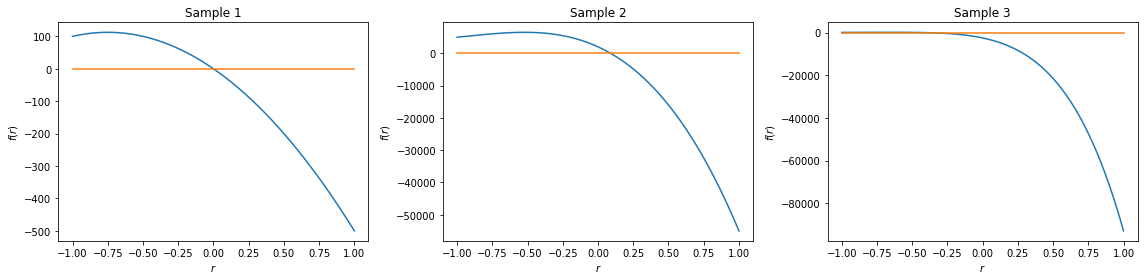

In [3]:
# このコードはプロット用なので気にしなくて良い．
%matplotlib inline
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
draw_f(total_cash, M=2, C=[200,100,100], title='Sample 1')
plt.subplot(1, 3, 2)
draw_f(total_cash, M=3, C=[10000,3000,4000,5000], title='Sample 2')
plt.subplot(1, 3, 3)
draw_f(total_cash, M=5, C=[3000,100,100,100,100,100], title='Sample 3')
plt.tight_layout()

Sampleの3つ目は非常に微妙な感じだが，$r = -0.4$くらいで$r$軸と交わっていると見て取れないこともない．

Small datasetは$M \le 2$なので，二次方程式の解の公式を使うだけでも解けそうである．

しかし，Large datasetは$M \le 100$なので，方程式を直接解く方法は使えない．

ここでも役に立ちそうなのは「2分探索」である．
方程式を直接解くのは難しいが，$r$に数値を代入して方程式を満たすか否か判定するのは簡単である．

以下に方針を示す．

- 横軸$r$，縦軸$f(r)$のグラフを考えると，問題の仮定より，$f(r)$はちょうど1度だけ$r$軸と交わるはずである．
- よって明らかに$f(-1) \times f(1) < 0$である．（$f(-1)$と$f(1)$の符号は必ず異なるはずである．）
- 以下，求める$r$の下界を$-1$，上界を$1$として「上界と下界の中間の符号と上界の符号が同じならば（求める解は中間と下界の間にあるはずなので）新たな上界を中間で置き換えて，そうでないならば新たな下界を中間で置き換えて」
- 上界と下界の差が十分小さく（この問題の場合は$10^{-10}$以下に）なるまで繰り返せば良い．

この方針に従えば，large datasetでも解ける．

# 今回の教訓「直接解くのは難しいが，値を入れれば正しいか否かは簡単に判断できる方程式のようなものを解く際には2分探索が有効である」

以下に，入力データを標準入力から受け取って，標準出力に表示するコードを記す．
ただし，肝心の問題を解く関数solutionは用意していない．
問題を解く関数solutionを作ってみよう．

$f(r) = -C_0 \cdot (1 + r)^M + C_1 \cdot (1 + r)^{M - 1} + \dots + C_{M-1} \cdot (1 + r)^1 + C_M \cdot (1 + r)^0 = 0$

In [4]:
def total_cash(M, C, r):
    cash = 0
    # 左辺の中の一番右のレートは(1 + r)^0=1だから1
    rate = 1
    # これは入力例1の左辺の一番右から計算している。# MはMonth, 月毎なので-1ずつ減っていくループで最終的に0になれば終了＝左辺の中の右から2番目の値で終了
    for i in range(M, 0, -1):  
        cash += C[i] * rate 
        rate *= 1 + r
    cash -= C[0] * rate
    return cash

def solution(M, C):
    """
    適切な解solを返すように、関数solutionの中身を作ってみる
    """
    left, right = -1, 1 # rの制約が-1以上１以下なのでその最大値でおく
    while right - left > 10e-10: # 左右の誤差が10^-10までになるまで計算を繰り返す
        # 真ん中(= 仮のr)求める
        middle = (left + right) / 2

        # 仮のrでのIRRを出す
        irr = total_cash(M, C, middle)

        # IRRが０以上(下界と中間の符号が同じならば {= 左が０以上 = 左の符号が "+"ならば?})
        if irr > 0:

            # 仮のrを左側に寄せていく
            left = middle
        # 符号が違うならば (= 左が０以下 = 符号 "-"ならば)
        else:
            # 右側を寄せてくる
            right = middle
    
    sol = middle
    return sol

T = int(input())
for case_number in range(1, T + 1):
    M = int(input())
    C = list(map(int, input().split()))
    # 組み込み関数round(x, y)は値xを小数第y位までに丸めて（四捨五入して）返す関数である．
    print(f'Case #{case_number}: {round(solution(M, C), 9)}')
    # yのデフォルト値は0であり、yが0のときは整数への丸めを意味する

ValueError: invalid literal for int() with base 10: ''